<a href="https://colab.research.google.com/github/harist13/postest2-daming/blob/main/C1_2109116101_Muhammad_Harist_Illyasa_postest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

##tabel tabulasi

In [15]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [16]:
# data in the form of transaction list
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

print("\nTABULASI")
df = pd.DataFrame(data)
df = pd.get_dummies(df.stack()).sum(level=0)
print(df)


TABULASI
    beef  butter  butter milk  canned beer  cling film/bags  curd  \
0      0       0            0            0                0     0   
1      0       0            0            0                0     0   
2      0       0            0            0                0     0   
3      0       0            0            1                0     0   
4      0       0            0            0                0     0   
5      0       0            0            0                0     0   
6      0       0            0            0                0     0   
7      0       0            0            0                0     0   
8      0       0            0            0                0     1   
9      1       0            0            0                0     0   
10     0       1            0            0                0     0   
11     0       0            0            0                0     0   
12     0       0            0            0                0     0   
13     0       0        

<ipython-input-16-643e8049610b>:25: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df = pd.get_dummies(df.stack()).sum(level=0)


##daftar support dan confident

In [17]:
# data in the form of transaction list
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

# convert data to one-hot encoding format
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# find frequently occurring itemsets (support) with Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# find association rules with Association Rule Mining algorithm
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# create table of support for itemsets
df_support = frequent_itemsets
df_support['support'] = df_support['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_support = df_support.rename(columns={"itemsets": "itemset"})
df_support = df_support.set_index('itemset')
print(df_support)

# create table of support and confidence for rules
df_rules = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# filter rules with only one antecedent and one consequent
df_rules = df_rules[df_rules['antecedents'].apply(lambda x: len(x) == 1) & df_rules['consequents'].apply(lambda x: len(x) == 1)]

# format antecedent and consequent columns
df_rules['antecedents'] = df_rules['antecedents'].apply(lambda x: list(x)[0])
df_rules['consequents'] = df_rules['consequents'].apply(lambda x: list(x)[0])

# set antecedent as index and sort by confidence
df_rules = df_rules.set_index('antecedents')
df_rules = df_rules.sort_values(by=['confidence'], ascending=False)

# create table of support and confidence for filtered rules
df_rules = df_rules[['consequents', 'support', 'confidence']]
df_rules['support'] = df_rules['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_rules['confidence'] = df_rules['confidence'].apply(lambda x: "{:.2f}%".format(x*100))
print("\n")
print("HASIL SUPPORT DAN CONFIDENCE")
print("\n")

print(df_rules)


                                                   support
itemset                                                   
(beef)                                               5.26%
(butter)                                             5.26%
(butter milk)                                        5.26%
(canned beer)                                        5.26%
(cling film/bags)                                    5.26%
...                                                    ...
(whole milk, sausage, semi-finished bread)           5.26%
(semi-finished bread, sausage, yogurt)               5.26%
(whole milk, sausage, yogurt)                        5.26%
(whole milk, semi-finished bread, yogurt)            5.26%
(whole milk, semi-finished bread, sausage, yogurt)   5.26%

[65 rows x 1 columns]


HASIL SUPPORT DAN CONFIDENCE


                             consequents support confidence
antecedents                                                
white bread                         beef   5.26%    100.0

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

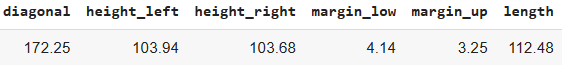
<!-- 1412 -->

In [20]:
import pandas as pd
import math

# Membuat data frame
df = pd.read_csv('deteksi_uang_palsu.csv')

# Menentukan target prediksi
target = {'height_left': 172.25,
          'height_right': 103.94,
          'margin_low': 103.68,
          'margin_up': 4.14,
          'length': 3.25}

# Membuat kolom jarak
df['jarak'] = df.apply(lambda x: math.sqrt((x['height_left'] - target['height_left'])**2 + 
                                           (x['height_right'] - target['height_right'])**2 + 
                                           (x['margin_low'] - target['margin_low'])**2 + 
                                           (x['margin_up'] - target['margin_up'])**2 + 
                                           (x['length'] - target['length'])**2), axis=1)

# Menampilkan tabel jarak
print(df)




   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length       jarak  
0  113.02  162.985541  
1  113.74  163.637621  
2  113.12  163.039278  
3  113.30  163.154696  
4  113.46  163.132317  
5  110.9

In [21]:
import pandas as pd
import math

# load data
df = pd.read_csv("deteksi_uang_palsu.csv")

# hitung jarak dari setiap data terhadap target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
jarak = []
for i in range(len(df)):
    d = 0
    for j in range(1, 7):
        d += (df.iloc[i, j] - target[j-1])**2
    jarak.append(math.sqrt(d))
df['jarak'] = jarak

# urutkan data berdasarkan jarak terdekat
K = int(math.sqrt(len(df)))
df_sorted = df.sort_values(by='jarak').head(K)

# tampilkan data terurut
print(df_sorted)


# Menghitung jumlah nilai True dan False untuk K terdekat
num_true = len(df_sorted[df_sorted["is_genuine"] == True])
num_false = len(df_sorted[df_sorted["is_genuine"] == False])
print("\n")
print("Jumlah True: ", num_true)
print("Jumlah False: ", num_false)


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


Jumlah True:  3
Jumlah False:  0


In [22]:
# mengambil data terdekat dengan target
data = pd.read_csv("deteksi_uang_palsu.csv")

test_data = pd.DataFrame({
    'is_genuine': [True],
    'diagonal': [172.20],
    'height_left': [104.12],
    'height_right': [103.64],
    'margin_low': [4.38],
    'margin_up': [3.00],
    'length': [113.18]
})

# menghitung jarak
distances = pd.DataFrame()
distances['distance'] = ((data.iloc[:,1:] - test_data.iloc[:,1:])**2).sum(axis=1)**0.5

# menambahkan kolom jarak ke data
data['distance'] = distances['distance']

# mengurutkan data berdasarkan jarak terdekat
k = int(math.sqrt(len(data)))
sorted_data = data.sort_values(by='distance').head(k)

# melakukan klasifikasi berdasarkan mayoritas kelas
pred_label = sorted_data['is_genuine'].value_counts().idxmax()

# menampilkan hasil prediksi
print("Hasil prediksi: ", pred_label)


Hasil prediksi:  True


# (3) Analisis

> Nama : Muhammad Harist Illyasa

> Nim : 2109116101


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

##Donload dataset di bawah ini sebelum menjalankan program

https://drive.google.com/file/d/1dHZ9d1zZHXBniOG4qqWYyW8b5IwrOmJk/view?usp=sharing

##Business Understanding

Tujuan dataset faskes BPJS adalah untuk memberikan informasi tentang layanan kesehatan yang disediakan oleh Fasilitas Kesehatan Tingkat Pertama (FKTP) yang bekerja sama dengan Badan Penyelenggara Jaminan Sosial (BPJS) Kesehatan. Data ini dapat digunakan untuk memahami penggunaan layanan kesehatan di Indonesia, serta memperoleh wawasan tentang masalah kesehatan dan tantangan yang dihadapi oleh masyarakat dan pemerintah dalam menyediakan layanan kesehatan yang terjangkau dan berkualitas. Data juga dapat digunakan oleh pihak-pihak terkait untuk melakukan evaluasi kinerja dan perencanaan strategis untuk perbaikan sistem kesehatan di Indonesia.

#Data Understanding

In [23]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
sns.set(style = 'whitegrid')
import textwrap

##colect intial data

In [24]:
df = pd.read_csv("Health_Suppliments_Flipkart_02_04_2022.csv")
df

,category,title,quantity,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,rating_count,review_count,1_stars_count,2_stars_count,3_stars_count,4_stars_count,5_stars_count
0,Vitamin Supplement,"Revital Women Multivitamin with Calcium, Zinc,...",30 Tablets,Revital,http://dl.flipkart.com/dl/revital-women-multiv...,VSLFUCNZ74TDDANJ,LSTVSLFUCNZ74TDDANJAGY8AW,Multi Vitamin Supplements Tablet Form Suitable...,IN_STOCK,243.0,345.0,INR,4.4,8190,611,211,198,775,2096,4910
1,Vitamin Supplement,MUSCLEBLAZE VITE Multivitamin,90 No,MUSCLEBLAZE,http://dl.flipkart.com/dl/muscleblaze-vite-mul...,VSLFGMHYFZXTEFSW,LSTVSLFGMHYFZXTEFSWCOQLV7,Multi Vitamin Supplements Tablet Form Suitable...,IN_STOCK,455.0,899.0,INR,4.2,41010,3527,2271,1305,3980,10320,23134
2,Vitamin Supplement,"Revital Men Multivitamin with Calcium, Zinc & ...",30 Capsules,Revital,http://dl.flipkart.com/dl/revital-men-multivit...,VSLFUCNZG3X83CGX,LSTVSLFUCNZG3X83CGXYTZXP1,Multi Vitamin Supplements Capsules Form Suitab...,IN_STOCK,214.0,310.0,INR,4.4,5632,513,216,157,491,1281,3487
3,Vitamin Supplement,Purna Gummies Flowing Hair Biotin Cranberry Gu...,30 No,Purna Gummies,http://dl.flipkart.com/dl/purna-gummies-flowin...,VSLFZT4GJSJWZAZA,LSTVSLFZT4GJSJWZAZA6TI8AD,Special Supplements Gummies Form Suitable For:...,IN_STOCK,149.0,499.0,INR,4.3,1736,558,100,58,176,288,1114
4,Vitamin Supplement,MUSCLEBLAZE Omega 3 Fish Oil 1000 mg,120 No,MUSCLEBLAZE,http://dl.flipkart.com/dl/muscleblaze-omega-3-...,VSLFJQHFSFHGQN67,LSTVSLFJQHFSFHGQN67MQUUVF,Omega Fatty Acids/Fish Oil Supplements Capsule...,IN_STOCK,631.0,1099.0,INR,4.3,21096,1864,828,550,1905,5389,12424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,Milk Drink Mixes,okhli musal brand Organics Barley Sattu - 100%...,980 g,okhli musal brand,http://dl.flipkart.com/dl/okhli-musal-brand-or...,MDMGCNHRZF3SKQWH,LSTMDMGCNHRZF3SKQWHBRZ4RG,NaN,IN_STOCK,199.0,499.0,INR,0.0,0,0,0,0,0,0,0
3072,Milk Drink Mixes,Smart'O Bite Oat Smoothie I Instant Healthy Sh...,12 x 25 g,Smart'O Bite,http://dl.flipkart.com/dl/smart-o-bite-oat-smo...,MDMGATFFX9MNEUZF,LSTMDMGATFFX9MNEUZFMANOZX,NaN,IN_STOCK,249.0,360.0,INR,0.0,0,0,0,0,0,0,0
3073,Milk Drink Mixes,KESARI Buttermilk Chaach Masala Powder Combo P...,5 x 30 g,KESARI,http://dl.flipkart.com/dl/kesari-buttermilk-ch...,MDMFBD2XBC5CUV6R,LSTMDMFBD2XBC5CUV6RDJ9W8K,NaN,IN_STOCK,239.0,300.0,INR,0.0,0,0,0,0,0,0,0
3074,Milk Drink Mixes,The Tea Planet Mint White Chocolate Milk Shake...,250 g,The Tea Planet,http://dl.flipkart.com/dl/tea-planet-mint-whit...,MDMG46EJ3XTZNHFE,LSTMDMG46EJ3XTZNHFE7KNGZV,NaN,IN_STOCK,175.0,275.0,INR,0.0,0,0,0,0,0,0,0


In [25]:
df.head()

,category,title,quantity,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,rating_count,review_count,1_stars_count,2_stars_count,3_stars_count,4_stars_count,5_stars_count
0,Vitamin Supplement,"Revital Women Multivitamin with Calcium, Zinc,...",30 Tablets,Revital,http://dl.flipkart.com/dl/revital-women-multiv...,VSLFUCNZ74TDDANJ,LSTVSLFUCNZ74TDDANJAGY8AW,Multi Vitamin Supplements Tablet Form Suitable...,IN_STOCK,243.0,345.0,INR,4.4,8190,611,211,198,775,2096,4910
1,Vitamin Supplement,MUSCLEBLAZE VITE Multivitamin,90 No,MUSCLEBLAZE,http://dl.flipkart.com/dl/muscleblaze-vite-mul...,VSLFGMHYFZXTEFSW,LSTVSLFGMHYFZXTEFSWCOQLV7,Multi Vitamin Supplements Tablet Form Suitable...,IN_STOCK,455.0,899.0,INR,4.2,41010,3527,2271,1305,3980,10320,23134
2,Vitamin Supplement,"Revital Men Multivitamin with Calcium, Zinc & ...",30 Capsules,Revital,http://dl.flipkart.com/dl/revital-men-multivit...,VSLFUCNZG3X83CGX,LSTVSLFUCNZG3X83CGXYTZXP1,Multi Vitamin Supplements Capsules Form Suitab...,IN_STOCK,214.0,310.0,INR,4.4,5632,513,216,157,491,1281,3487
3,Vitamin Supplement,Purna Gummies Flowing Hair Biotin Cranberry Gu...,30 No,Purna Gummies,http://dl.flipkart.com/dl/purna-gummies-flowin...,VSLFZT4GJSJWZAZA,LSTVSLFZT4GJSJWZAZA6TI8AD,Special Supplements Gummies Form Suitable For:...,IN_STOCK,149.0,499.0,INR,4.3,1736,558,100,58,176,288,1114
4,Vitamin Supplement,MUSCLEBLAZE Omega 3 Fish Oil 1000 mg,120 No,MUSCLEBLAZE,http://dl.flipkart.com/dl/muscleblaze-omega-3-...,VSLFJQHFSFHGQN67,LSTVSLFJQHFSFHGQN67MQUUVF,Omega Fatty Acids/Fish Oil Supplements Capsule...,IN_STOCK,631.0,1099.0,INR,4.3,21096,1864,828,550,1905,5389,12424


In [26]:
df.tail()

,category,title,quantity,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,rating_count,review_count,1_stars_count,2_stars_count,3_stars_count,4_stars_count,5_stars_count
3071,Milk Drink Mixes,okhli musal brand Organics Barley Sattu - 100%...,980 g,okhli musal brand,http://dl.flipkart.com/dl/okhli-musal-brand-or...,MDMGCNHRZF3SKQWH,LSTMDMGCNHRZF3SKQWHBRZ4RG,NaN,IN_STOCK,199.0,499.0,INR,0.0,0,0,0,0,0,0,0
3072,Milk Drink Mixes,Smart'O Bite Oat Smoothie I Instant Healthy Sh...,12 x 25 g,Smart'O Bite,http://dl.flipkart.com/dl/smart-o-bite-oat-smo...,MDMGATFFX9MNEUZF,LSTMDMGATFFX9MNEUZFMANOZX,NaN,IN_STOCK,249.0,360.0,INR,0.0,0,0,0,0,0,0,0
3073,Milk Drink Mixes,KESARI Buttermilk Chaach Masala Powder Combo P...,5 x 30 g,KESARI,http://dl.flipkart.com/dl/kesari-buttermilk-ch...,MDMFBD2XBC5CUV6R,LSTMDMFBD2XBC5CUV6RDJ9W8K,NaN,IN_STOCK,239.0,300.0,INR,0.0,0,0,0,0,0,0,0
3074,Milk Drink Mixes,The Tea Planet Mint White Chocolate Milk Shake...,250 g,The Tea Planet,http://dl.flipkart.com/dl/tea-planet-mint-whit...,MDMG46EJ3XTZNHFE,LSTMDMG46EJ3XTZNHFE7KNGZV,NaN,IN_STOCK,175.0,275.0,INR,0.0,0,0,0,0,0,0,0
3075,Milk Drink Mixes,okhli musal brand Organic Home Made Chana Satt...,675 g,okhli musal brand,http://dl.flipkart.com/dl/okhli-musal-brand-or...,MDMGCNHRH44BSYRA,LSTMDMGCNHRH44BSYRATYLTFA,NaN,IN_STOCK,170.0,499.0,INR,0.0,0,0,0,0,0,0,0


In [27]:
# df1 isinya dataset dengan label target Milk Drink Mixes
df1 = df[df['category'] == 'Milk Drink Mixes']

# Menampilkan hasil filter
print(df1)

              category                                              title  \
2386  Milk Drink Mixes  Gritzo SuperMilk 8-12y (Young Athletes)Whey Pr...   
2387  Milk Drink Mixes  Gritzo SuperMilk, Kids Protein & Nutrition Dri...   
2388  Milk Drink Mixes         Lite Horlicks Regular Malt Flavour Flavour   
2389  Milk Drink Mixes                              HORLICKS Classic Malt   
2390  Milk Drink Mixes                              HORLICKS Classic Malt   
...                ...                                                ...   
3071  Milk Drink Mixes  okhli musal brand Organics Barley Sattu - 100%...   
3072  Milk Drink Mixes  Smart'O Bite Oat Smoothie I Instant Healthy Sh...   
3073  Milk Drink Mixes  KESARI Buttermilk Chaach Masala Powder Combo P...   
3074  Milk Drink Mixes  The Tea Planet Mint White Chocolate Milk Shake...   
3075  Milk Drink Mixes  okhli musal brand Organic Home Made Chana Satt...   

       quantity              brand  \
2386       1 kg             Gritzo   

In [28]:
# df2 isinya dataset dengan label target bukan Milk Drink Mixes
df2 = df[df['category'] != 'Milk Drink Mixes']

# Menampilkan hasil filter
print(df2)

                category                                              title  \
0     Vitamin Supplement  Revital Women Multivitamin with Calcium, Zinc,...   
1     Vitamin Supplement                      MUSCLEBLAZE VITE Multivitamin   
2     Vitamin Supplement  Revital Men Multivitamin with Calcium, Zinc & ...   
3     Vitamin Supplement  Purna Gummies Flowing Hair Biotin Cranberry Gu...   
4     Vitamin Supplement               MUSCLEBLAZE Omega 3 Fish Oil 1000 mg   
...                  ...                                                ...   
2381       Energy Drinks    nourishvitals Red Wine with Mother Energy Drink   
2382       Energy Drinks  Herbalife Nutrition DINOSHAKE CHOCLATE + STRAW...   
2383       Energy Drinks  HERBALIFE FORMULA 1 KULFI + PROTIEN POWDER (40...   
2384       Energy Drinks  Naturewell Complete Health Drink Nutrition Dri...   
2385       Energy Drinks  HERBALIFE WEIGHTLOSS SUPER COMBO: FORMULA 1+PR...   

                                              quant

##describe data

In [29]:
# df3 isinya dataset dengan label target Revital
df3 = df[df['brand'] == 'Revital']

# Menampilkan hasil filter
print(df3)

               category                                              title  \
0    Vitamin Supplement  Revital Women Multivitamin with Calcium, Zinc,...   
2    Vitamin Supplement  Revital Men Multivitamin with Calcium, Zinc & ...   
482  Vitamin Supplement  Revital Daily Health For Men (30 Cap each) Pac...   
542  Vitamin Supplement             Revital Daily Health (30 Cap), For Men   
763  Vitamin Supplement  Revital Woman Daily Health Suppliment - 60 Tab...   
820  Vitamin Supplement  Revital Men Multivitamin wit Calcium, Zinc & G...   

        quantity    brand                                                url  \
0     30 Tablets  Revital  http://dl.flipkart.com/dl/revital-women-multiv...   
2    30 Capsules  Revital  http://dl.flipkart.com/dl/revital-men-multivit...   
482  60 Capsules  Revital  http://dl.flipkart.com/dl/revital-daily-health...   
542        30 No  Revital  http://dl.flipkart.com/dl/revital-daily-health...   
763    2 x 30 No  Revital  http://dl.flipkart.com/dl/

In [30]:
# df4 isinya dataset dengan label target selling_price di bawah 100
df4 = df[df['selling_price'] < 100]

# Menampilkan hasil filter
print(df4)

                category                                              title  \
29    Vitamin Supplement  Nector Utsava Vitamin C Pineapple Chewable Tab...   
200   Vitamin Supplement  Fast&Up Fortify Calcium With Vitamin D3 Supple...   
268   Vitamin Supplement                         Treasure Herbs Tulsi Drops   
291   Vitamin Supplement  HealthVit Tulsi Drops Natural Immunity Booster...   
318   Vitamin Supplement  HealthVit Calvitan-Kid Kid’s Calcium with Vita...   
...                  ...                                                ...   
2975    Milk Drink Mixes                        Nydile Foods Kashaya Powder   
2989    Milk Drink Mixes  Mr.Kool Chocolate Flavor Milkshake Powder 100g...   
2993    Milk Drink Mixes  Strawfit Milk Flavouring Straw With Colostrum ...   
3030    Milk Drink Mixes  okhli musal brand NATURAL & FIBRE RICH CHANE K...   
3058    Milk Drink Mixes    okhli musal brand Roasted Gram Flour Sattu 270g   

        quantity              brand  \
29    30 Tab

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        3076 non-null   object 
 1   title           3076 non-null   object 
 2   quantity        3076 non-null   object 
 3   brand           3076 non-null   object 
 4   url             3076 non-null   object 
 5   product_id      3076 non-null   object 
 6   listing_id      3076 non-null   object 
 7   highlights      2395 non-null   object 
 8   availability    3076 non-null   object 
 9   selling_price   3076 non-null   float64
 10  original_price  3076 non-null   float64
 11  currency        3076 non-null   object 
 12  avg_rating      3076 non-null   float64
 13  rating_count    3076 non-null   int64  
 14  review_count    3076 non-null   int64  
 15  1_stars_count   3076 non-null   int64  
 16  2_stars_count   3076 non-null   int64  
 17  3_stars_count   3076 non-null   i

In [32]:
df.select_dtypes(include=np.number)

,selling_price,original_price,avg_rating,rating_count,review_count,1_stars_count,2_stars_count,3_stars_count,4_stars_count,5_stars_count
0,243.0,345.0,4.4,8190,611,211,198,775,2096,4910
1,455.0,899.0,4.2,41010,3527,2271,1305,3980,10320,23134
2,214.0,310.0,4.4,5632,513,216,157,491,1281,3487
3,149.0,499.0,4.3,1736,558,100,58,176,288,1114
4,631.0,1099.0,4.3,21096,1864,828,550,1905,5389,12424
...,...,...,...,...,...,...,...,...,...,...
3071,199.0,499.0,0.0,0,0,0,0,0,0,0
3072,249.0,360.0,0.0,0,0,0,0,0,0,0
3073,239.0,300.0,0.0,0,0,0,0,0,0,0
3074,175.0,275.0,0.0,0,0,0,0,0,0,0


In [33]:
def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())

In [34]:
tampil("selling_price")

Nilai minimum         : 10.0
Nilai maksimum        : 13804.0


In [35]:
tampil("original_price")

Nilai minimum         : 10.0
Nilai maksimum        : 16299.0


In [36]:
tampil("selling_price")

Nilai minimum         : 10.0
Nilai maksimum        : 13804.0


##Explore Data

##Visualisasi Comparison

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

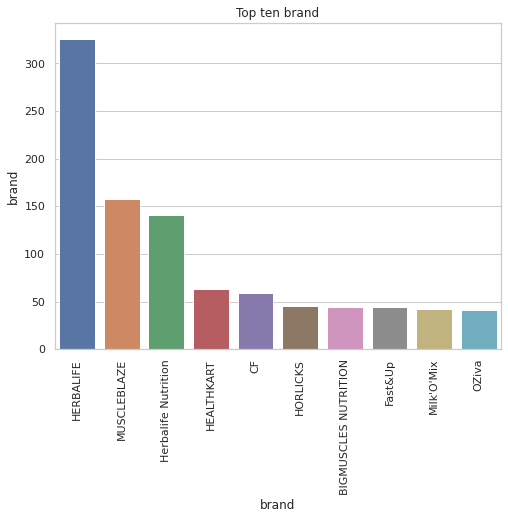

In [38]:
country_count = Counter(df['brand'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten brand')
plt.xlabel('brand')
plt.ylabel('brand')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

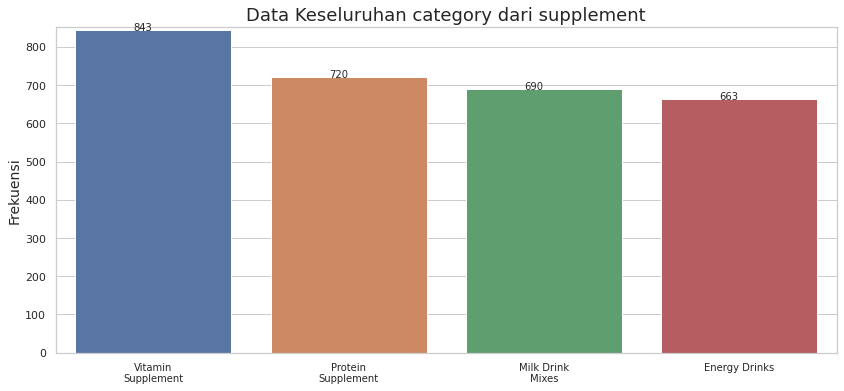

In [39]:
fig, ax = plt.subplots(figsize = (14, 6))
max_width = 13

index = df['category'].fillna('NaN').value_counts().index[0:4]
count = df['category'].fillna('NaN').value_counts()[0:4]
sns.barplot(x = index, y = count, order = index)
ax.set_title('Data Keseluruhan category dari supplement', fontsize = 18)
ax.set_xticklabels((textwrap.fill(x, max_width) for x in index), fontsize = 10)
for i, count in enumerate(count):
    ax.text(x=i-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Frekuensi', fontsize = 14)
ax.set_ylim(0, df['category'].fillna('NaN').value_counts()[0]+10)

plt.show()

##Visualisasi Distribution

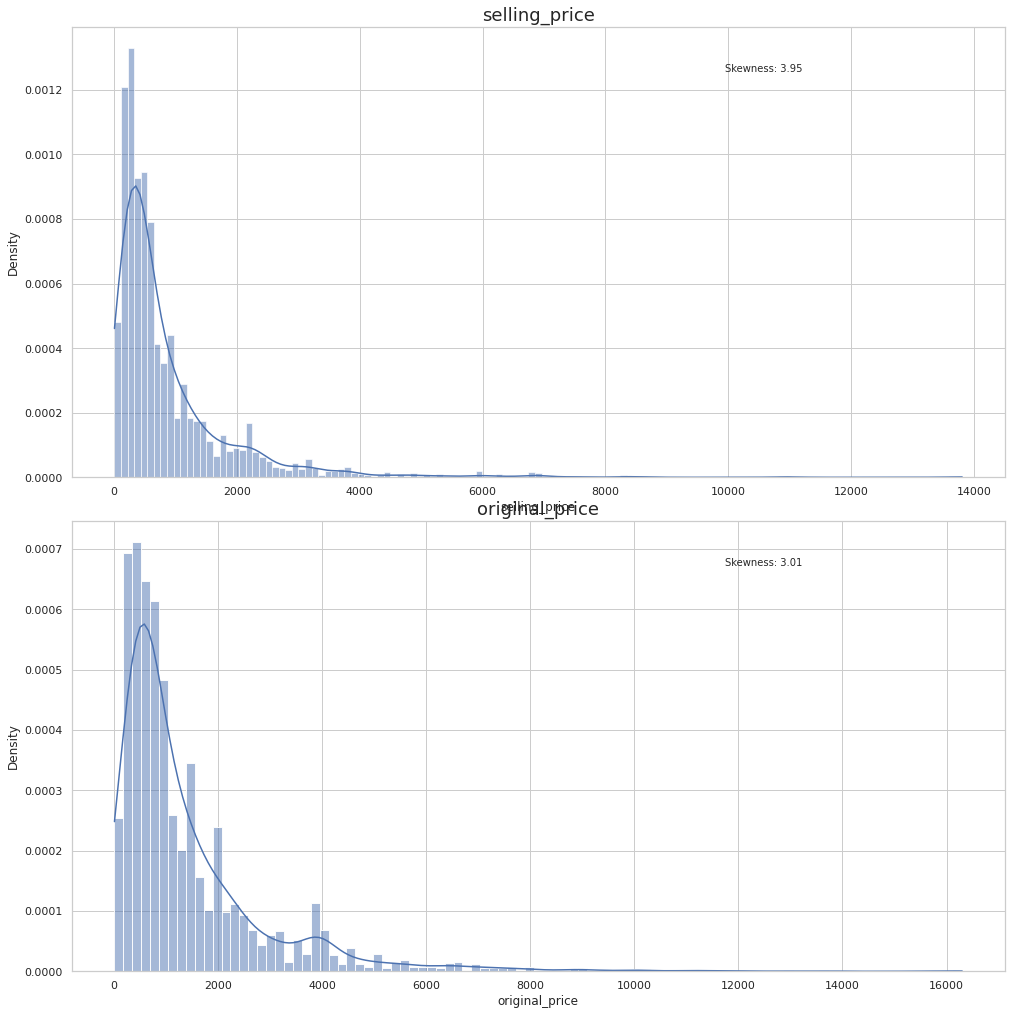

In [40]:
# Mendefinisikan Kolom pada list dari dataset
num_cols = ['selling_price', 'original_price']

# Membuat diagram
fig, ax = plt.subplots(2, figsize=(14, 14))
fig.tight_layout(pad=2)

for ax, col in zip(ax.flatten(), num_cols):
    sns.histplot(ax=ax, data=df, x=col, kde=True, stat='density')
    ax.set_title(col, fontsize=18)
    ax.annotate(f"Skewness: {df[col].skew():.2f}", xy=(0.7, 0.9), xycoords='axes fraction')

plt.show()

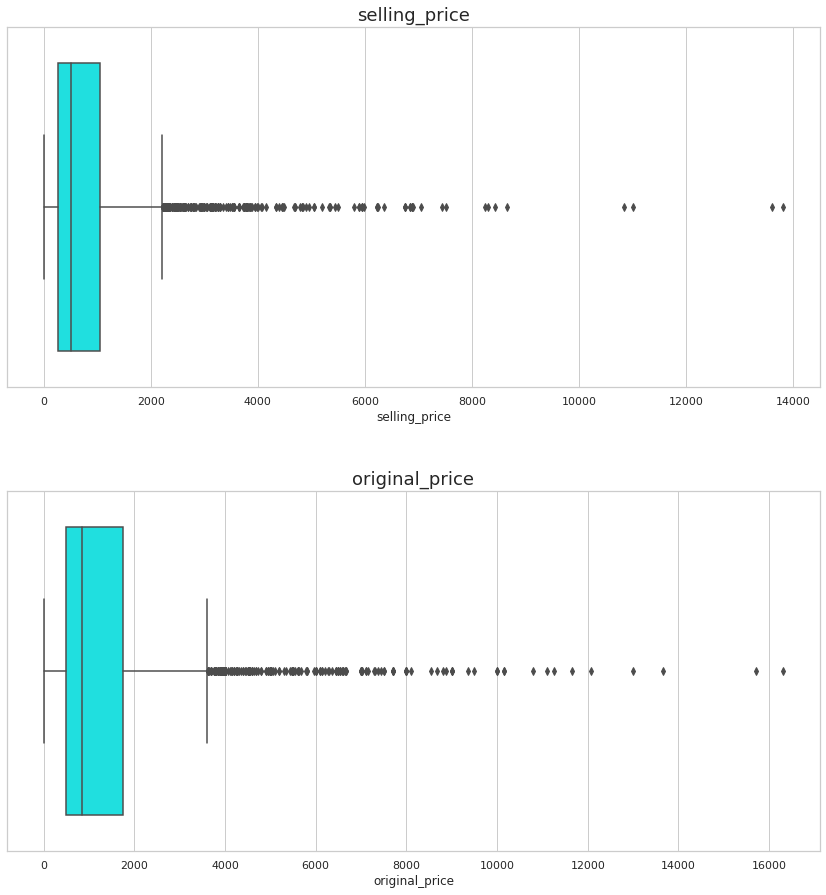

In [41]:
num_cols = ['selling_price', 'original_price']

fig, ax = plt.subplots(len(num_cols), 1, figsize = (14, 14))
fig.tight_layout(pad = 8)

for i, col in enumerate(num_cols):
    sns.boxplot(ax = ax[i], x = df[col], orient = 'h', color = 'aqua')
    ax[i].set_title(col, fontsize = 18)

plt.show()


##Visualisasi Relationship

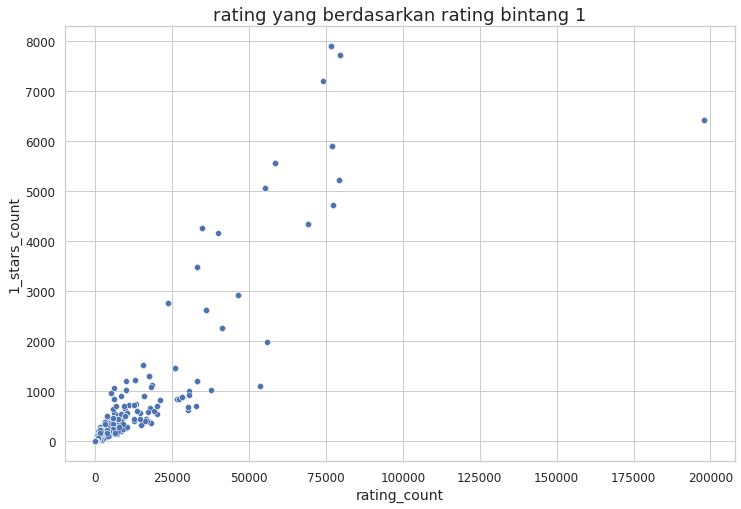

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x="rating_count", y="1_stars_count")
ax.set_title('rating yang berdasarkan rating bintang 1', fontsize=18)
ax.set_xlabel('rating_count', fontsize=14)
ax.set_ylabel('1_stars_count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##Visualisasi Composition

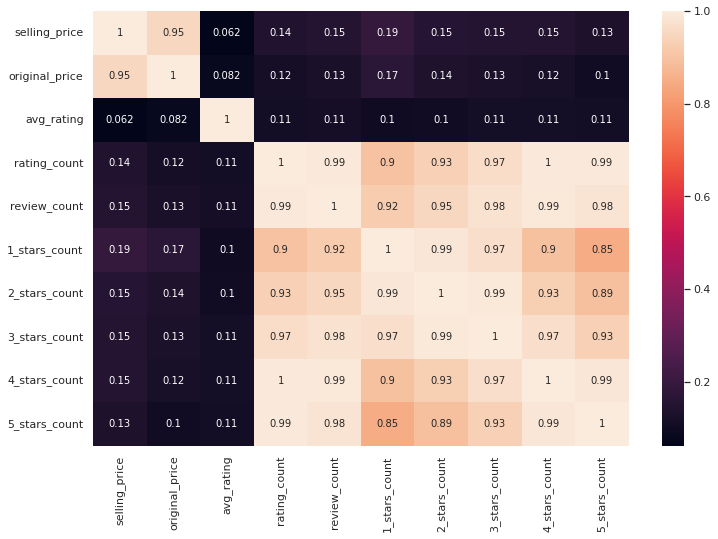

In [43]:
cormat = df.corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat.columns, rotation = 0)
plt.show()

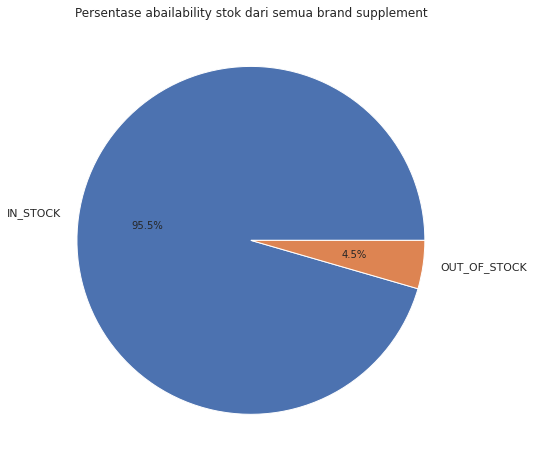

In [44]:
#Calculate count of each Level category
level_count = df['availability'].value_counts()

#Create pie chart for Level categories
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(level_count, labels=level_count.index, autopct='%1.1f%%')
ax.set_title('Persentase abailability stok dari semua brand supplement')
plt.show()

##verify data quality

In [45]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 category            0
title               0
quantity            0
brand               0
url                 0
product_id          0
listing_id          0
highlights        681
availability        0
selling_price       0
original_price      0
currency            0
avg_rating          0
rating_count        0
review_count        0
1_stars_count       0
2_stars_count       0
3_stars_count       0
4_stars_count       0
5_stars_count       0
dtype: int64


In [46]:
# Check for duplicates
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [47]:
# Check for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 1_stars_count     493
2_stars_count     489
3_stars_count     499
4_stars_count     495
5_stars_count     478
availability        0
avg_rating        657
brand               0
category            0
currency            0
highlights          0
listing_id          0
original_price    273
product_id          0
quantity            0
rating_count      482
review_count      480
selling_price     262
title               0
url                 0
dtype: int64


<ipython-input-47-650d731e3b3f>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


In [48]:
# Check data types
print("Data types:\n", df.dtypes)

Data types:
 category           object
title              object
quantity           object
brand              object
url                object
product_id         object
listing_id         object
highlights         object
availability       object
selling_price     float64
original_price    float64
currency           object
avg_rating        float64
rating_count        int64
review_count        int64
1_stars_count       int64
2_stars_count       int64
3_stars_count       int64
4_stars_count       int64
5_stars_count       int64
dtype: object


#Data Preparation

##select data

In [49]:
import pandas as pd

In [50]:
df = pd.read_csv("Health_Suppliments_Flipkart_02_04_2022.csv")

In [51]:
# Membuat hanya menampikan 2 Kolom
selected_data = df[["category", "brand"]]

# Menampilkan Perintah
print(selected_data.head())

             category          brand
0  Vitamin Supplement        Revital
1  Vitamin Supplement    MUSCLEBLAZE
2  Vitamin Supplement        Revital
3  Vitamin Supplement  Purna Gummies
4  Vitamin Supplement    MUSCLEBLAZE


In [52]:
# Membuat hanya menampikan 3 Kolom
selected_data = df[["category", "brand", "title"]]

# Menampilkan Perintah
print(selected_data.head())

             category          brand  \
0  Vitamin Supplement        Revital   
1  Vitamin Supplement    MUSCLEBLAZE   
2  Vitamin Supplement        Revital   
3  Vitamin Supplement  Purna Gummies   
4  Vitamin Supplement    MUSCLEBLAZE   

                                               title  
0  Revital Women Multivitamin with Calcium, Zinc,...  
1                      MUSCLEBLAZE VITE Multivitamin  
2  Revital Men Multivitamin with Calcium, Zinc & ...  
3  Purna Gummies Flowing Hair Biotin Cranberry Gu...  
4               MUSCLEBLAZE Omega 3 Fish Oil 1000 mg  


##clean data

In [53]:
df.isna().sum()

category            0
title               0
quantity            0
brand               0
url                 0
product_id          0
listing_id          0
highlights        681
availability        0
selling_price       0
original_price      0
currency            0
avg_rating          0
rating_count        0
review_count        0
1_stars_count       0
2_stars_count       0
3_stars_count       0
4_stars_count       0
5_stars_count       0
dtype: int64

In [54]:
df.isna().sum() / len(df) * 100

category           0.000000
title              0.000000
quantity           0.000000
brand              0.000000
url                0.000000
product_id         0.000000
listing_id         0.000000
highlights        22.139142
availability       0.000000
selling_price      0.000000
original_price     0.000000
currency           0.000000
avg_rating         0.000000
rating_count       0.000000
review_count       0.000000
1_stars_count      0.000000
2_stars_count      0.000000
3_stars_count      0.000000
4_stars_count      0.000000
5_stars_count      0.000000
dtype: float64

In [55]:
df["highlights"] = df["highlights"].fillna(df["highlights"].mode()[0])
df["rating_count"] = df["rating_count"].fillna(df["rating_count"].mode()[0])


In [56]:
df.isna().sum()

category          0
title             0
quantity          0
brand             0
url               0
product_id        0
listing_id        0
highlights        0
availability      0
selling_price     0
original_price    0
currency          0
avg_rating        0
rating_count      0
review_count      0
1_stars_count     0
2_stars_count     0
3_stars_count     0
4_stars_count     0
5_stars_count     0
dtype: int64

In [57]:
df.isna().sum() / len(df) * 100

category          0.0
title             0.0
quantity          0.0
brand             0.0
url               0.0
product_id        0.0
listing_id        0.0
highlights        0.0
availability      0.0
selling_price     0.0
original_price    0.0
currency          0.0
avg_rating        0.0
rating_count      0.0
review_count      0.0
1_stars_count     0.0
2_stars_count     0.0
3_stars_count     0.0
4_stars_count     0.0
5_stars_count     0.0
dtype: float64

##construct data

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv("Health_Suppliments_Flipkart_02_04_2022.csv")

In [60]:
# Create a new feature that calculates the difference between the maximum and minimum values of each banknote
df["rating_count"] = df["review_count"] + df["3_stars_count"] + df["4_stars_count"] + df["5_stars_count"]

# Display the first few rows of the modified dataset
print(df.head())

             category                                              title  \
0  Vitamin Supplement  Revital Women Multivitamin with Calcium, Zinc,...   
1  Vitamin Supplement                      MUSCLEBLAZE VITE Multivitamin   
2  Vitamin Supplement  Revital Men Multivitamin with Calcium, Zinc & ...   
3  Vitamin Supplement  Purna Gummies Flowing Hair Biotin Cranberry Gu...   
4  Vitamin Supplement               MUSCLEBLAZE Omega 3 Fish Oil 1000 mg   

      quantity          brand  \
0   30 Tablets        Revital   
1        90 No    MUSCLEBLAZE   
2  30 Capsules        Revital   
3        30 No  Purna Gummies   
4       120 No    MUSCLEBLAZE   

                                                 url        product_id  \
0  http://dl.flipkart.com/dl/revital-women-multiv...  VSLFUCNZ74TDDANJ   
1  http://dl.flipkart.com/dl/muscleblaze-vite-mul...  VSLFGMHYFZXTEFSW   
2  http://dl.flipkart.com/dl/revital-men-multivit...  VSLFUCNZG3X83CGX   
3  http://dl.flipkart.com/dl/purna-gummies-flowi

In [61]:
import pandas as pd


# Membaca dataset kesehatan
df = pd.read_csv('Health_Suppliments_Flipkart_02_04_2022.csv')

# Menambahkan kolom diskon
df['diskon'] = df['selling_price'] / ((df['original_price'] / 100) ** 2)


# Mengubah nilai kategori menjadi numerik pada kolom availability
df['availability'] = df['availability'].map({'IN_STOCK': 0, 'OUT_STOCK': 1})

# Menghapus kolom-kolom yang tidak diperlukan
df = df.drop(['3_stars_count', '4_stars_count', '5_stars_count'], axis=1)

# Menampilkan lima baris pertama dari dataset yang telah diproses
print(df.head())

             category                                              title  \
0  Vitamin Supplement  Revital Women Multivitamin with Calcium, Zinc,...   
1  Vitamin Supplement                      MUSCLEBLAZE VITE Multivitamin   
2  Vitamin Supplement  Revital Men Multivitamin with Calcium, Zinc & ...   
3  Vitamin Supplement  Purna Gummies Flowing Hair Biotin Cranberry Gu...   
4  Vitamin Supplement               MUSCLEBLAZE Omega 3 Fish Oil 1000 mg   

      quantity          brand  \
0   30 Tablets        Revital   
1        90 No    MUSCLEBLAZE   
2  30 Capsules        Revital   
3        30 No  Purna Gummies   
4       120 No    MUSCLEBLAZE   

                                                 url        product_id  \
0  http://dl.flipkart.com/dl/revital-women-multiv...  VSLFUCNZ74TDDANJ   
1  http://dl.flipkart.com/dl/muscleblaze-vite-mul...  VSLFGMHYFZXTEFSW   
2  http://dl.flipkart.com/dl/revital-men-multivit...  VSLFUCNZG3X83CGX   
3  http://dl.flipkart.com/dl/purna-gummies-flowi

In [62]:
df

,category,title,quantity,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,rating_count,review_count,1_stars_count,2_stars_count,diskon
0,Vitamin Supplement,"Revital Women Multivitamin with Calcium, Zinc,...",30 Tablets,Revital,http://dl.flipkart.com/dl/revital-women-multiv...,VSLFUCNZ74TDDANJ,LSTVSLFUCNZ74TDDANJAGY8AW,Multi Vitamin Supplements Tablet Form Suitable...,0.0,243.0,345.0,INR,4.4,8190,611,211,198,20.415879
1,Vitamin Supplement,MUSCLEBLAZE VITE Multivitamin,90 No,MUSCLEBLAZE,http://dl.flipkart.com/dl/muscleblaze-vite-mul...,VSLFGMHYFZXTEFSW,LSTVSLFGMHYFZXTEFSWCOQLV7,Multi Vitamin Supplements Tablet Form Suitable...,0.0,455.0,899.0,INR,4.2,41010,3527,2271,1305,5.629788
2,Vitamin Supplement,"Revital Men Multivitamin with Calcium, Zinc & ...",30 Capsules,Revital,http://dl.flipkart.com/dl/revital-men-multivit...,VSLFUCNZG3X83CGX,LSTVSLFUCNZG3X83CGXYTZXP1,Multi Vitamin Supplements Capsules Form Suitab...,0.0,214.0,310.0,INR,4.4,5632,513,216,157,22.268470
3,Vitamin Supplement,Purna Gummies Flowing Hair Biotin Cranberry Gu...,30 No,Purna Gummies,http://dl.flipkart.com/dl/purna-gummies-flowin...,VSLFZT4GJSJWZAZA,LSTVSLFZT4GJSJWZAZA6TI8AD,Special Supplements Gummies Form Suitable For:...,0.0,149.0,499.0,INR,4.3,1736,558,100,58,5.983912
4,Vitamin Supplement,MUSCLEBLAZE Omega 3 Fish Oil 1000 mg,120 No,MUSCLEBLAZE,http://dl.flipkart.com/dl/muscleblaze-omega-3-...,VSLFJQHFSFHGQN67,LSTVSLFJQHFSFHGQN67MQUUVF,Omega Fatty Acids/Fish Oil Supplements Capsule...,0.0,631.0,1099.0,INR,4.3,21096,1864,828,550,5.224371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,Milk Drink Mixes,okhli musal brand Organics Barley Sattu - 100%...,980 g,okhli musal brand,http://dl.flipkart.com/dl/okhli-musal-brand-or...,MDMGCNHRZF3SKQWH,LSTMDMGCNHRZF3SKQWHBRZ4RG,NaN,0.0,199.0,499.0,INR,0.0,0,0,0,0,7.991936
3072,Milk Drink Mixes,Smart'O Bite Oat Smoothie I Instant Healthy Sh...,12 x 25 g,Smart'O Bite,http://dl.flipkart.com/dl/smart-o-bite-oat-smo...,MDMGATFFX9MNEUZF,LSTMDMGATFFX9MNEUZFMANOZX,NaN,0.0,249.0,360.0,INR,0.0,0,0,0,0,19.212963
3073,Milk Drink Mixes,KESARI Buttermilk Chaach Masala Powder Combo P...,5 x 30 g,KESARI,http://dl.flipkart.com/dl/kesari-buttermilk-ch...,MDMFBD2XBC5CUV6R,LSTMDMFBD2XBC5CUV6RDJ9W8K,NaN,0.0,239.0,300.0,INR,0.0,0,0,0,0,26.555556
3074,Milk Drink Mixes,The Tea Planet Mint White Chocolate Milk Shake...,250 g,The Tea Planet,http://dl.flipkart.com/dl/tea-planet-mint-whit...,MDMG46EJ3XTZNHFE,LSTMDMG46EJ3XTZNHFE7KNGZV,NaN,0.0,175.0,275.0,INR,0.0,0,0,0,0,23.140496


In [63]:
import pandas as pd

df = pd.read_csv("Health_Suppliments_Flipkart_02_04_2022.csv")

# Convert the date column to datetime format

# Convert the original_price column to float format
df['original_price'] = df['original_price'].astype(float)


# Convert the category column to categorical format
df['category'] = df['category'].astype('category')

# Rename the columns to remove spaces

# Display the formatted DataFrame
print(df.head())

             category                                              title  \
0  Vitamin Supplement  Revital Women Multivitamin with Calcium, Zinc,...   
1  Vitamin Supplement                      MUSCLEBLAZE VITE Multivitamin   
2  Vitamin Supplement  Revital Men Multivitamin with Calcium, Zinc & ...   
3  Vitamin Supplement  Purna Gummies Flowing Hair Biotin Cranberry Gu...   
4  Vitamin Supplement               MUSCLEBLAZE Omega 3 Fish Oil 1000 mg   

      quantity          brand  \
0   30 Tablets        Revital   
1        90 No    MUSCLEBLAZE   
2  30 Capsules        Revital   
3        30 No  Purna Gummies   
4       120 No    MUSCLEBLAZE   

                                                 url        product_id  \
0  http://dl.flipkart.com/dl/revital-women-multiv...  VSLFUCNZ74TDDANJ   
1  http://dl.flipkart.com/dl/muscleblaze-vite-mul...  VSLFGMHYFZXTEFSW   
2  http://dl.flipkart.com/dl/revital-men-multivit...  VSLFUCNZG3X83CGX   
3  http://dl.flipkart.com/dl/purna-gummies-flowi

##integrate data

In [64]:
df = pd.read_csv('Health_Suppliments_Flipkart_02_04_2022.csv')

# Melakukan integrasi data dengan menambahkan kolom baru
df['total price'] = df['selling_price'] + df['original_price']

# Melakukan perubahan pada nilai data tertentu
df.loc[df['rating_count'] == 'nilai_awal', 'rating_count'] = 'nilai_baru'

# Melakukan penghapusan kolom yang tidak diperlukan
df = df.drop(['1_stars_count', '2_stars_count'], axis=1)

# Menyimpan dataset yang telah diubah
df.to_csv('integrity data.csv', index=False)

print("berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu total price")

berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu total price


##format data

In [65]:
# Membaca file csv
df = pd.read_csv('Health_Suppliments_Flipkart_02_04_2022.csv')

# Menghapus kolom yang tidak diperlukan
df = df.drop(['1_stars_count', '2_stars_count'], axis=1)

# Mengganti nilai null dengan nilai rata-rata
mean_value = df['rating_count'].mean()
df['rating_count'] = df['rating_count'].fillna(mean_value)

# Mengubah tipe data review count dari string ke integer
df['review_count'] = df['review_count'].astype(int)

# Menghapus baris yang duplikat
df = df.drop_duplicates()

# Mengurutkan data berdasarkan kolom5
df = df.sort_values('brand')

# Menyimpan hasil pengolahan data ke file csv
df.to_csv('data_cleaned.csv', index=False)